<a href="https://www.kaggle.com/code/fethullahceviz/top-1000-movies-data-analysis?scriptVersionId=108683057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-1000-highest-grossing-movies-of-all-time/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv


In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df= pd.read_csv('../input/top-1000-highest-grossing-movies-of-all-time/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv')

In [4]:
df.shape

(1000, 10)

In [5]:
df.head(3)

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,Avatar,2009,"Action,Adventure,Fantasy",7.80,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,"Action,Adventure,Drama",8.40,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,Titanic,1997,"Drama,Romance",7.90,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...


* DATA DICTIONARY:
* Movie Title: The name of the movie.
* Year of Release: The year the movie was released.
* Genre: Categories where the movie belongs.
* Movie Rating: Ratings given by IMDb registered users (on a scale of 1 to 10)
* Duration: Movie running time in minutes.
* Gross: Gross earnings in U.S. dollars.
* Worldwide LT Gross: Worldwide Lifetime Gross (International + Domestic totals.
* Metascore: Weighted average of many reviews coming from reputed critics (on a scale of 0 to 100)
* Votes: Number of votes cast by IMDb registered users.
* Logline: A one or two sentence summary of the film

In [6]:
df.isnull().sum()

Movie Title           0
Year of Realease      0
Genre                 0
Movie Rating          0
Duration              0
Gross                 0
Worldwide LT Gross    0
Metascore             0
Votes                 0
Logline               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Title         1000 non-null   object 
 1   Year of Realease    1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Movie Rating        1000 non-null   float64
 4   Duration            1000 non-null   int64  
 5   Gross               1000 non-null   object 
 6   Worldwide LT Gross  1000 non-null   object 
 7   Metascore           1000 non-null   object 
 8   Votes               1000 non-null   object 
 9   Logline             1000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


## Data Cleaning

In [8]:
cleaning_list=[ 'Year of Realease', 'Gross', 'Worldwide LT Gross', 'Metascore', 'Votes']

for i in cleaning_list:
    df[i]=df[i].replace(r'[$|M|******|,|X]' , '', regex=True)
    df[i] = pd.to_numeric(df[i])

In [9]:
df.describe()

,Year of Realease,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes
count,1000.00,1000.00,1000.00,966.00,1000.00,964.00,1000.00
mean,2007.61,6.80,117.68,156.16,410597609.19,59.64,339378.43
std,10.40,0.90,21.56,110.63,295192727.44,15.95,323134.91
min,1937.00,2.50,69.00,0.01,176600207.00,12.00,396.00
25%,2002.00,6.20,102.00,90.83,222036282.25,48.00,134794.00
50%,2010.00,6.80,116.00,129.25,308412060.50,59.00,244812.50
75%,2016.00,7.40,130.00,187.09,473344182.25,71.00,441000.25
max,2022.00,9.20,238.00,936.66,2847397339.00,100.00,2622926.00


## Count Year

In [10]:
#Count Plot Graphic
def count_plot(data): 
    plt.figure(figsize=(14,6))
    ax = sns.countplot(x=data, palette= "ch:start=.2,rot=-.3" , edgecolor='white', linewidth=1, order=data.value_counts().index)
    plt.xticks(rotation=90)    
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge')
    None
    

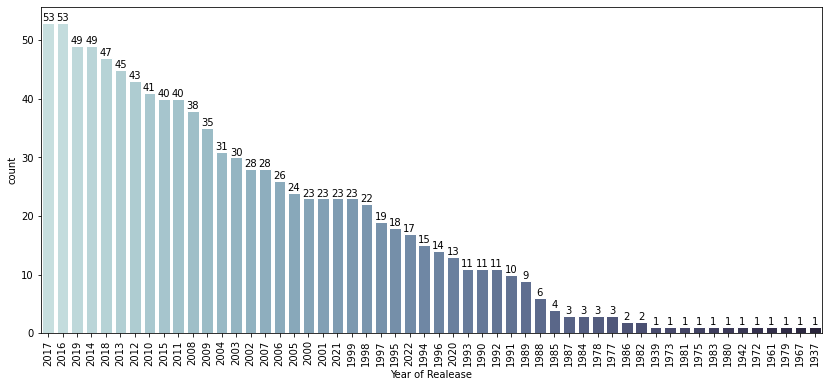

In [11]:
count_plot(df['Year of Realease'])


## Count Movie Rating

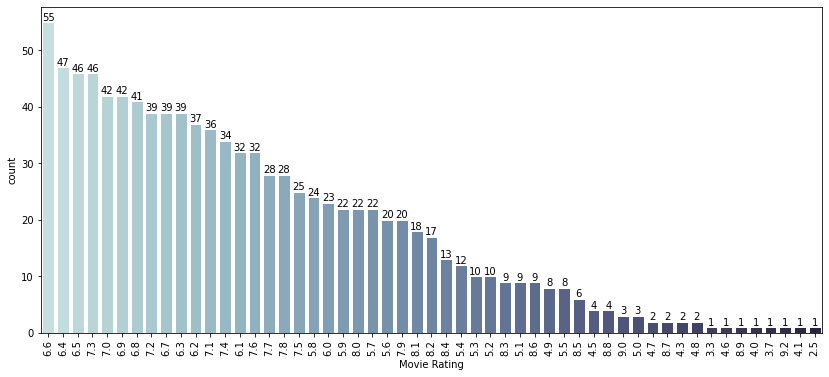

In [12]:
count_plot(df['Movie Rating'])

## Genre Types Analysis

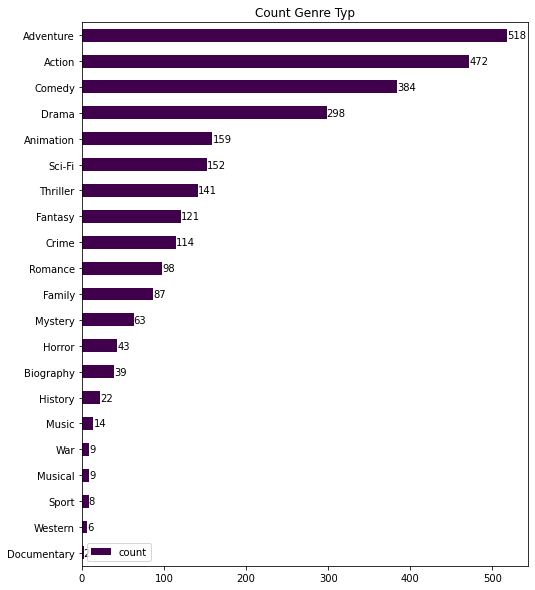

In [13]:
# Genre columns get dummies
gd_df_x = df['Genre'].str.get_dummies(sep=',')
df      = pd.concat([gd_df_x, df], axis=1, join='inner')

#Genre columns
data = df.iloc[:, 0:21]
df_x = pd.DataFrame(data.sum(), columns=['count'])
df_x.sort_values(by='count', ascending=True, inplace=True)
ax   = df_x.plot(kind='barh', cmap='PRGn' , figsize=(8,10) ,title= 'Count Genre Typ')
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f', label_type='edge')

## Top 10 Worldwide LT Gross

In [14]:
def top_10_vis(data, title):
    top_10_gross = df[['Movie Title',data]][0:10]
    top_10_gross.sort_values(by=data, inplace=True)
    ax   = top_10_gross.plot(kind='barh',color='salmon', figsize=(9,8) , title= title)
    ax.set_yticklabels(list(top_10_gross['Movie Title']), minor=False)
    plt.ylabel('The name of the movie' ,fontsize=16)
    plt.xlabel(data ,fontsize=16)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.set_tick_params(labelsize='large')

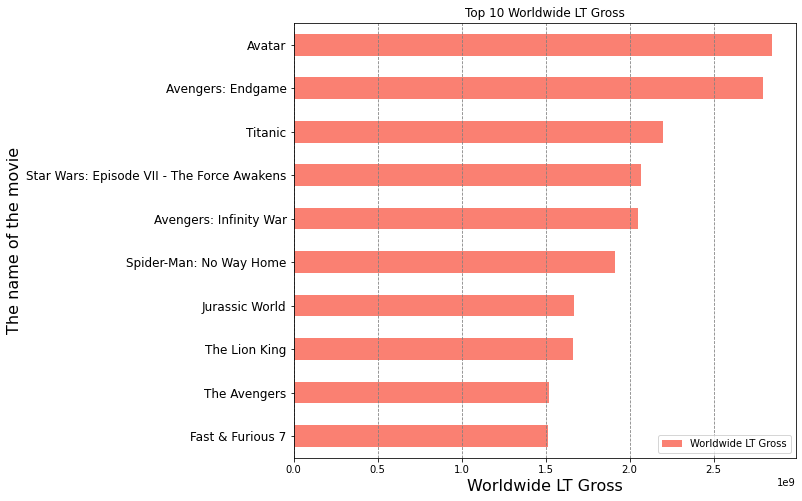

In [15]:
top_10_vis('Worldwide LT Gross','Top 10 Worldwide LT Gross' )

## Top 10 Metascore 

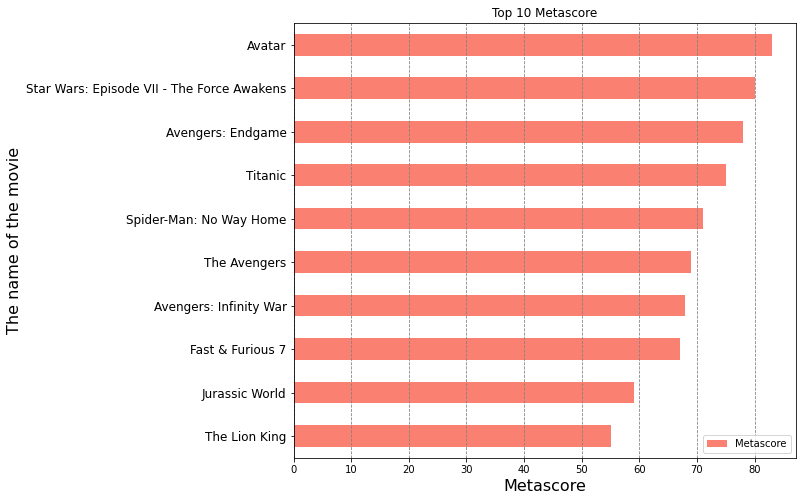

In [16]:
top_10_vis('Metascore','Top 10 Metascore')

## Top 10 Movie Rating 

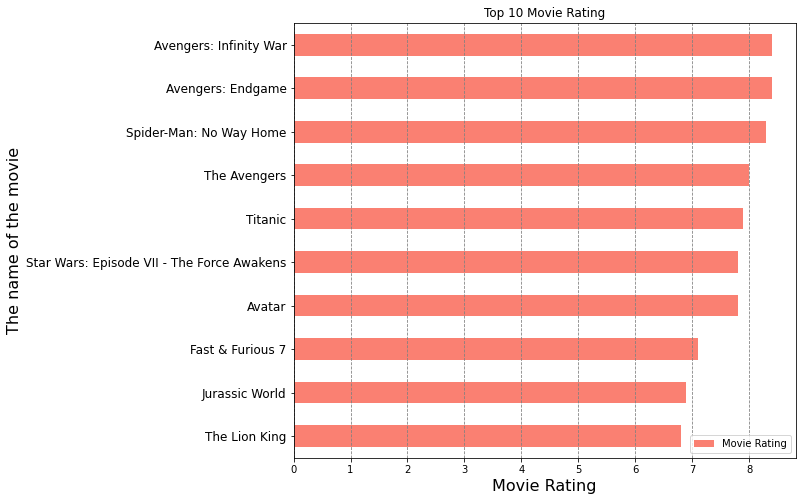

In [17]:
top_10_vis('Movie Rating','Top 10 Movie Rating' )

## Genre & Worldwide LT Gross

In [18]:
def number_ord(num):
    num = float("{:.3g}".format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    result = "{}{}".format("{:f}".format(num).rstrip("0").rstrip('.'), ["", "K", "M", "B", "T"][magnitude])
    return result

In [19]:
# Filter Genre and Worldwide LT Gross column
gen_df = df[["Genre", "Worldwide LT Gross"]]
gen_df = gen_df.dropna(how="any", axis=0)
gen_df["Genre"] = gen_df["Genre"].str.split(",")
gen_df = gen_df.explode("Genre")

# Get the median group by Genre
gen_df = gen_df.groupby(["Genre"]).median()["Worldwide LT Gross"].sort_values(ascending=False)
gen_df = pd.DataFrame({"Genre": gen_df.index,  "Worldwide LT Gross": gen_df.values})

# Create Label column used for visualization
gen_df["Label"] = gen_df.apply(lambda row: "$" + number_ord(round(row["Worldwide LT Gross"], 0)), axis=1)

# Show the chart
fig = px.bar(gen_df,
             width =700, height=700, 
             x     ="Worldwide LT Gross", y="Genre", 
             title ="Movie Genre vs. Worldwide LT Gross", text="Label", color="Genre")

fig.show()

## Genre & Worldwide LT Gross & Movie Rating & Metascore

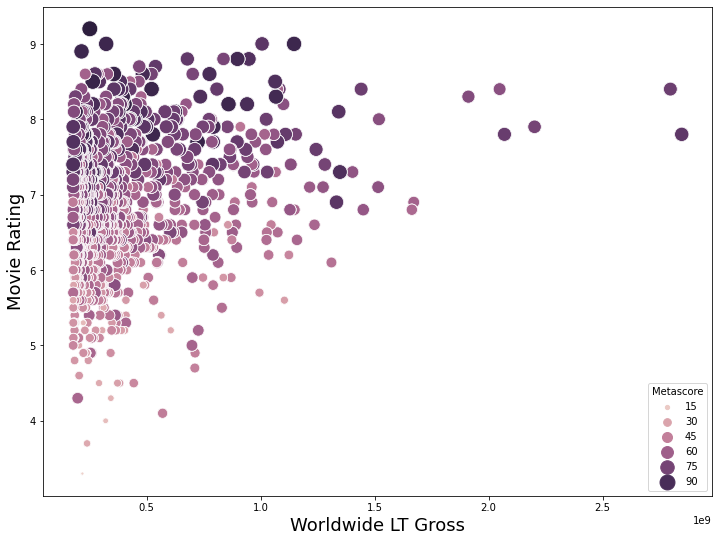

In [20]:
# Filter Genre and 4 columns
gen_df = df[["Genre", "Worldwide LT Gross", 'Movie Rating','Metascore', 'Duration']]
gen_df = gen_df.dropna(how="any", axis=0)
gen_df["Genre"] = gen_df["Genre"].str.split(",")
gen_df = gen_df.explode("Genre")
# scatter plot
plt.figure(figsize=(12,9))
sns.scatterplot(data=gen_df, x ="Worldwide LT Gross", 
                             y ="Movie Rating", hue="Metascore", size="Metascore", sizes=(10, 250))
plt.xlabel("Worldwide LT Gross", size=18)
plt.ylabel("Movie Rating", size=18)
None

## Genre & Worldwide LT Gross Boxplot

In [21]:
def genre_box_plor(x ,xlabel, title):
    plt.figure(figsize=(12, 10))
    sns.boxplot(data=gen_df, x= x, y='Genre', palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, size=18)
    plt.ylabel("Movie Genre", size=18)
    sns.despine(left=True)

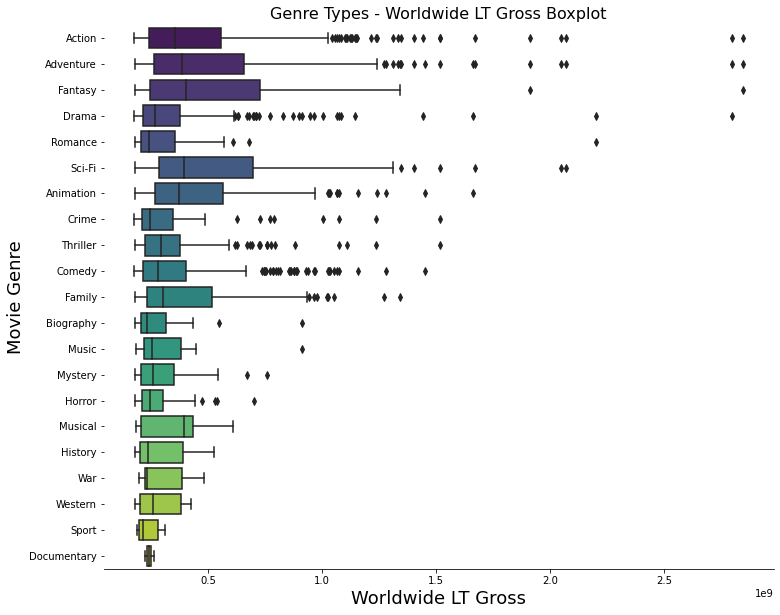

In [22]:
genre_box_plor('Worldwide LT Gross', "Worldwide LT Gross", 'Genre Types - Worldwide LT Gross Boxplot' )

## Movie Genre & Duration Boxplot

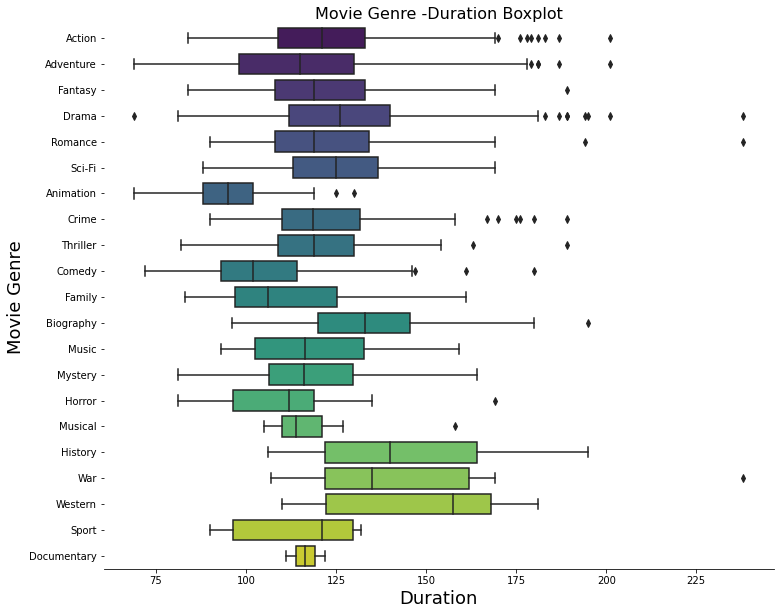

In [23]:
genre_box_plor('Duration', "Duration", 'Movie Genre -Duration Boxplot' )

## Year & Sum of Worldwide LT Gross

In [24]:
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data , palette="rocket_r", linewidth=4.0)
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, size=16)
    plt.xlabel(xlabel, size=18)


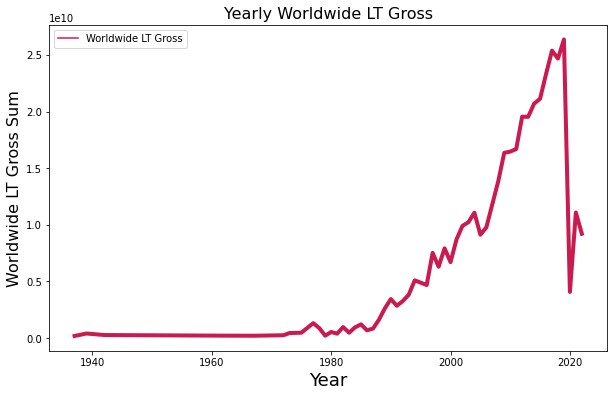

In [25]:
df_year = df.groupby(['Year of Realease'])[['Worldwide LT Gross']].sum()
line_plot(df_year,'Yearly Worldwide LT Gross','Year', "Worldwide LT Gross Sum")


## Year & Median Movie Rating

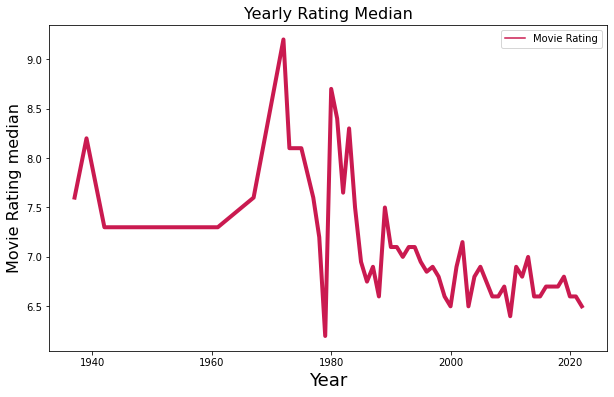

In [26]:
df_year_rating = df.groupby(['Year of Realease'])[['Movie Rating']].median()
line_plot(df_year_rating,'Yearly Rating Median', 'Year', "Movie Rating median")

## Duration & Median Movie Rating

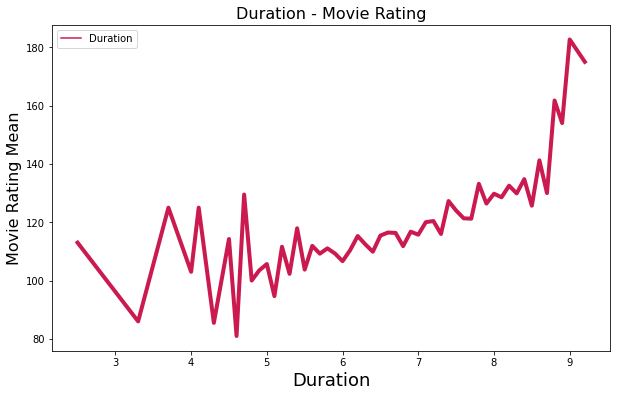

In [27]:
df_duration = df.groupby(['Movie Rating'])[['Duration']].mean()
line_plot(df_duration,'Duration - Movie Rating', 'Duration', "Movie Rating Mean")

## Avengers Serie & Worldwide LT Gross

Text(0, 0.5, 'The name of the movie')

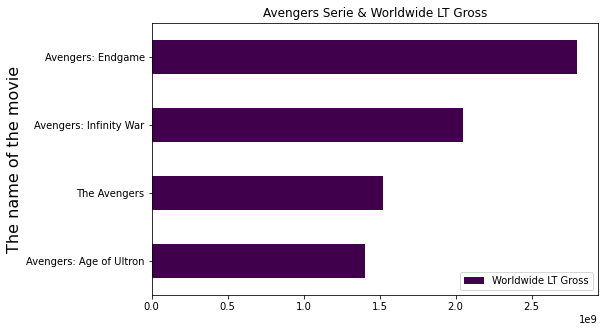

In [28]:
filter_film_serie=df[['Movie Title',"Worldwide LT Gross"]]
df_x = filter_film_serie[filter_film_serie['Movie Title'].str.contains("Avengers", na=False)].sort_values("Worldwide LT Gross", ascending=True)
ax   = df_x.plot(kind='barh', cmap='PRGn' , figsize=(8,5) ,title= 'Avengers Serie & Worldwide LT Gross')
ax.set_yticklabels(list(df_x['Movie Title']), minor=False)
plt.ylabel('The name of the movie' ,fontsize=16)

## Logline count analaysis

In [29]:
df['Logline']

0      A paraplegic Marine dispatched to the moon Pan...
1      After the devastating events of Avengers: Infi...
2      A seventeen-year-old aristocrat falls in love ...
3      As a new threat to the galaxy rises, Rey, a de...
4      The Avengers and their allies must be willing ...
                             ...                        
995    A group of Iraq War veterans look to clear the...
996    Michael Dorsey, an unsuccessful actor, disguis...
997    Secret Service agent Frank Horrigan couldn't s...
998    A comedy about a psychiatrist whose number-one...
999    One of the world's top bodyguards gets a new c...
Name: Logline, Length: 1000, dtype: object

In [30]:
df['Count_logline_wort'] = df['Logline'].str.findall(r'(\w+)').str.len()

## Correlation HeatMap

<AxesSubplot:>

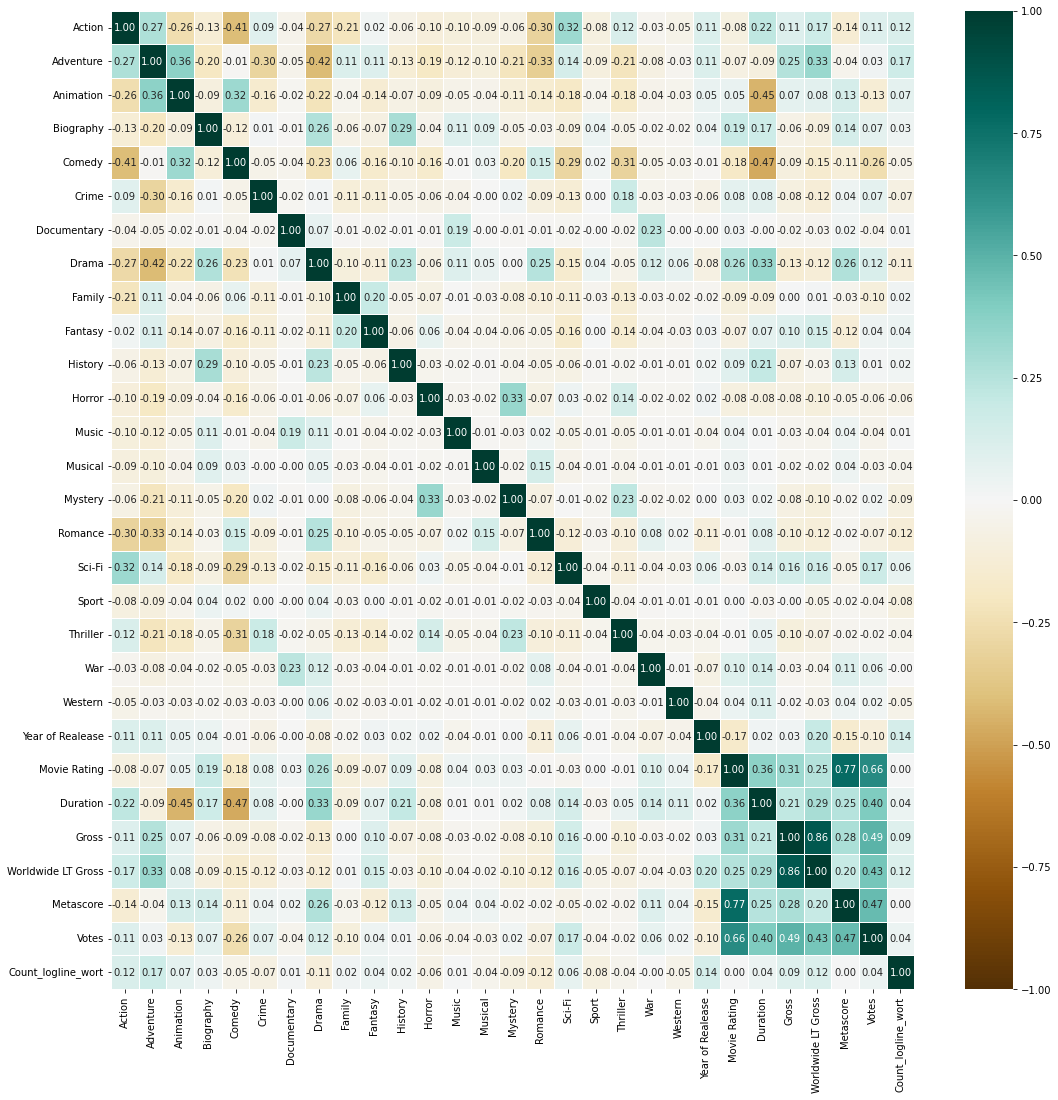

In [31]:
fig, ax = plt.subplots(figsize=(18,18))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

## Outlier Detection

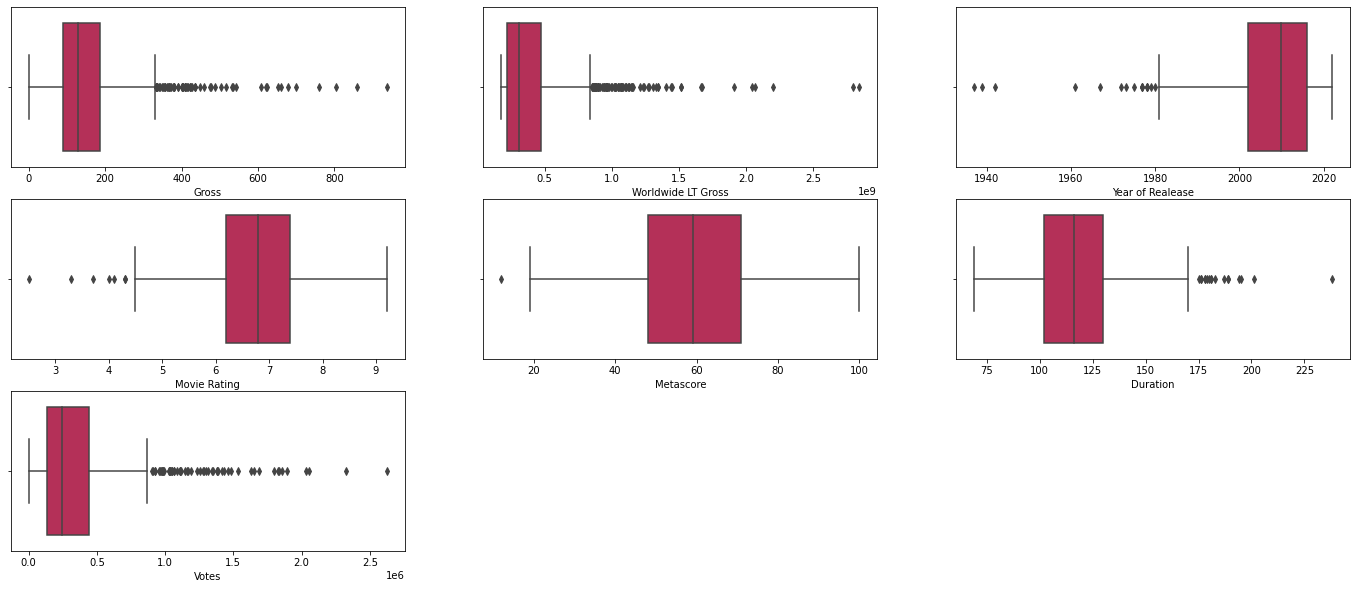

In [32]:
df_box_plot=df[['Gross', 'Worldwide LT Gross', 'Year of Realease','Movie Rating', 'Metascore','Duration','Votes']]
# elimizde numeric olarak gözüken tüm datanin Outlier box grafigi
i = 1
plt.figure(figsize=(24, 10))
for feature in df_box_plot.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_box_plot[feature], palette="rocket_r")
    i += 1